# Nvidia Stock Price Analysis and Prediction

## Project Overview

This project aims to explore the historical trends and patterns in NVIDIA's stock price using a dataset spanning 20 years. By employing technical analysis and machine learning techniques, we will seek to identify significant trends, patterns, and potential future price movements. 

### Dataset:

The dataset provides daily stock price data for NVIDIA from January 2, 2004, to January 1, 2024. It includes the following attributes:

* Date: The date of the stock price record.
* Open: The opening price of the stock on that day.
* High: The highest price reached during the day.
* Low: The lowest price reached during the day.
* Close: The closing price of the stock on that day.   
* Volume: The total number of shares traded on that day.

### Outcome Variable:

'Close' (Close Price) was selected as the most suitable outcome variable for the following reasons:

1. **End-of-Day Value:** The close price represents the final price at which the stock traded during the day, reflecting the market’s consensus value.
2. **Widely Used:** It is commonly used in financial analysis, technical indicators, and trading strategies.
3. **Stability**: Compared to intraday prices (Open, High, Low), the close price is less volatile and more stable, making it a reliable indicator for trends and patterns.
s.

## Setup: Import Libraries, Supress Warnings, and Directory Traversal

In [130]:
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/nvidia-daily-stock-price-data/nvidia_stock_prices.csv


# Methodology:


## Nvidia Stock Price Analysis

### Data Exploration:

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import random

In [132]:
# Load the CSV file
df = pd.read_csv('/kaggle/input/nvidia-daily-stock-price-data/nvidia_stock_prices.csv')

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,433752000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5033 non-null   object 
 1   Open    5033 non-null   float64
 2   High    5033 non-null   float64
 3   Low     5033 non-null   float64
 4   Close   5033 non-null   float64
 5   Volume  5033 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 236.0+ KB


Given that the dataset has 5033 entries, and all 6 columns have 5033 non-nulls, then it is highly likely there are no missing values in the dataset. 

In [134]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#### Summary Statistics

In [135]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,5033,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,2013-12-30 20:12:49.640373504,5.214671,5.308604,5.117086,5.217039,5.587962e+08
min,2004-01-02 00:00:00,0.080583,0.083917,0.077500,0.078583,4.564400e+07
25%,2008-12-31 00:00:00,0.344000,0.349000,0.336500,0.343250,3.482920e+08
50%,2013-12-31 00:00:00,0.544000,0.552750,0.532500,0.542000,4.910920e+08
75%,2018-12-31 00:00:00,5.233750,5.296500,5.125000,5.229000,6.816760e+08
max,2023-12-29 00:00:00,50.216000,50.548000,49.411999,50.409000,5.088948e+09
std,NaN,9.643976,9.811276,9.465058,9.644928,3.363408e+08


In [136]:
# Extract mean and standard deviation
mean_values = df.describe().loc['mean']
std_values = df.describe().loc['std']

# Calculate CV
cv = std_values / mean_values

# Print the results
print(cv)

Date           NaN
Open      1.849393
High      1.848184
Low       1.849697
Close     1.848736
Volume    0.601903
dtype: object


The results suggest that the stock price (opening, high, low, and close) has a relatively high degree of variability compared to its average value. This indicates that the stock price can fluctuate significantly, which might be expected for a stock with a high level of volatility.

**Findings:**
* **Growth Over Time:** The consistent upward trend in all price points, from the minimum to the maximum values and across all percentiles, confirms NVIDIA's substantial stock price growth over the years.
* **Volatility:** The stock's high standard deviation and CV values (~1.82) across all price points indicate significant price volatility.
* **Trading Volume:** While the CV for volume is relatively lower than the CV for price, it still suggests a moderate degree of variability in trading activity. This indicates that while price fluctuations are not solely driven by volume changes, volume can still play a significant role in influencing the stock's volatility.


#### Distribution of Numerical Features

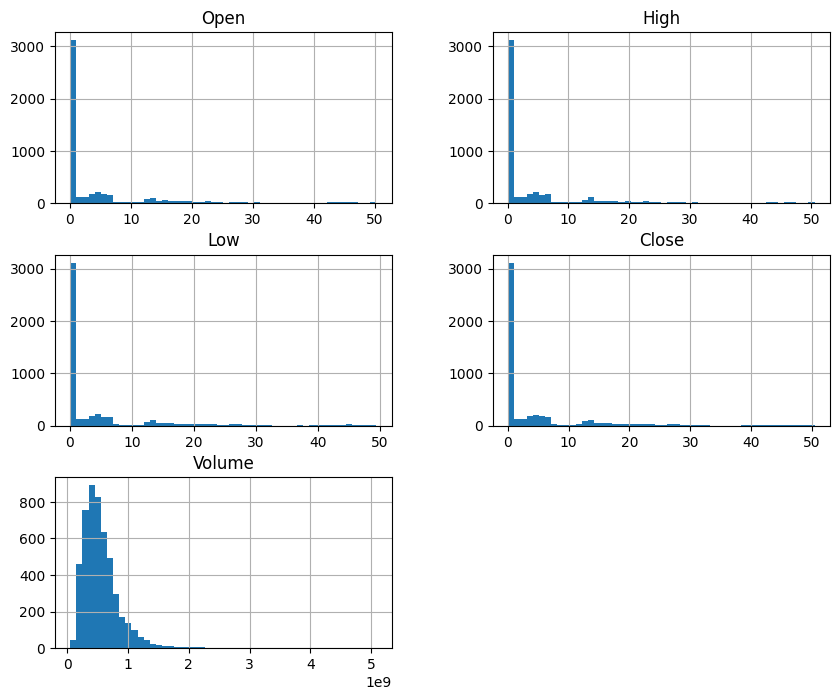

In [137]:
# Create a temporary copy of the DataFrame excluding 'Date'
df_temp = df.drop('Date', axis=1)

# Create the histogram
df_temp.hist(bins=50, figsize=(10, 8))
plt.show()

Based on the graphs above, all numerical values exhibited a right-skewed distribution, indicating a greater frequency of lower values compared to higher values. This is consistent with NVIDIA's growth trajectory and potential volatility.

#### Correlation Analysis

<Axes: >

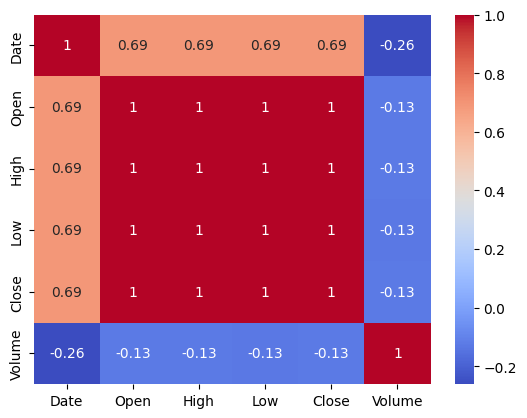

In [138]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

**Findings:**
* As expected **Open, High, Low and Close prices** have a **strong positive correlation (1),** given they all relate to stock price and typically move together.
* **Date and the price variable**s have **a moderate negative correlation (-0.13**), this suggests there's a slight tendancy for trading to crease as the stock price increases. However, the relationship is not very strong, suggesting that other factors might be more influential in determining trading volume.
* **Volume and Date** have a **weak negative correlation (-0.26)**, This indicates a slight tendency for trading volume to decrease over time. However, the correlation is weak, and other factors might be more influential in determining trading volume.

### Visualising the Data (Close Price)

Next, we'll delve deeper into the `Close` price, our primary outcome variable, to explore its behavior and relationships with other factors.

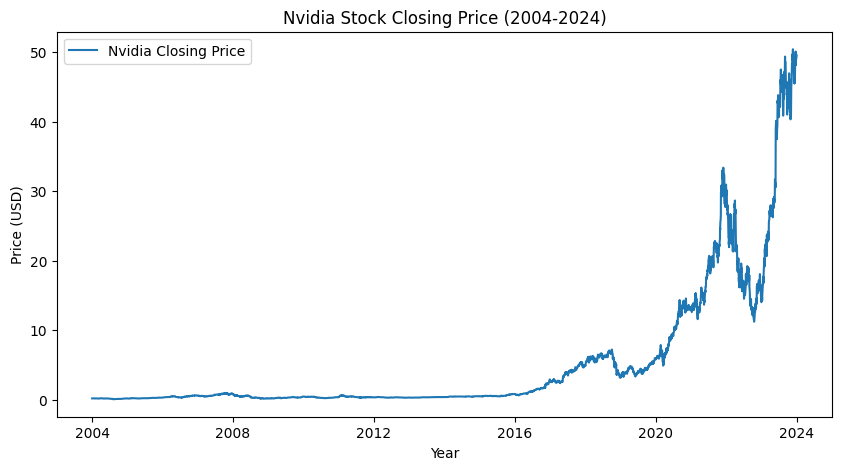

In [139]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Nvidia Closing Price')
plt.title('Nvidia Stock Closing Price (2004-2024)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The data visualization reveals exponential growth in the `Close` price over time, with notable volatility and significant growth post-2016. These observations align with the findings from the summary statistics, which show significant differences in minimum and maximum prices, as well as high standard deviations indicating volatility.

#### Moving Averages Analysis

To understand the overall trend and identify potential support and resistance levels for Nvidia's stock price, we plotted 50-day and 200-day moving averages. These averages smooth out short-term fluctuations, revealing the underlying price direction.

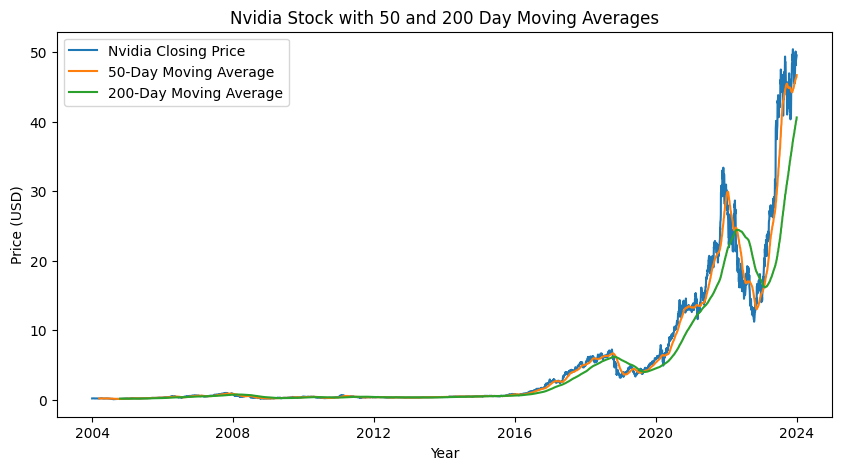

In [140]:
# Calculate 50-day and 200-day Moving Averages
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plot the stock price along with moving averages
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Nvidia Closing Price')
plt.plot(df['50_MA'], label='50-Day Moving Average')
plt.plot(df['200_MA'], label='200-Day Moving Average')
plt.title('Nvidia Stock with 50 and 200 Day Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#### Crossover Analysis

Crossovers between the 50-day and 200-day moving averages, also known as Golden and Death Crosses, can be potential indicators of a shift in the stock's trend. A Golden Cross (50-day MA crosses above the 200-day MA) suggests a potential transition to an uptrend, while a Death Cross (50-day MA crosses below the 200-day MA) might signal a potential downtrend. However, it's crucial to remember that these are not definitive indicators and should be interpreted with caution.

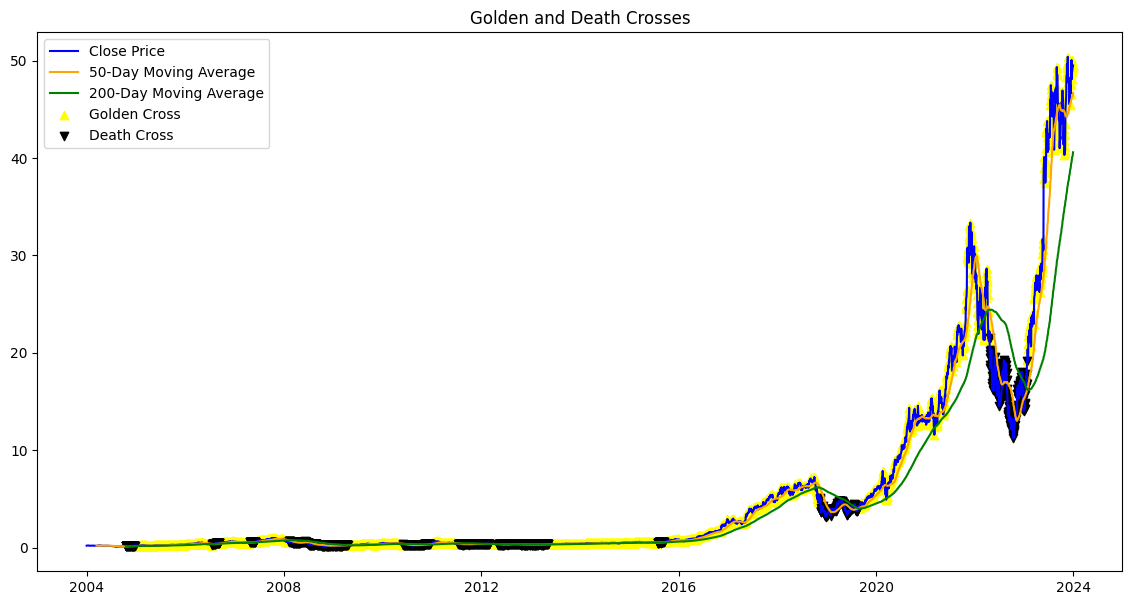

In [141]:
# Detect crossovers
df['Signal'] = 0.0
df.loc[df['50_MA'] > df['200_MA'], 'Signal'] = 1.0  # Golden Cross
df.loc[df['50_MA'] < df['200_MA'], 'Signal'] = -1.0  # Death Cross

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(df['200_MA'], label='200-Day Moving Average', color='green')

# Highlight Golden Crosses and Death Crosses
plt.scatter(df[df['Signal'] == 1.0].index, df[df['Signal'] == 1.0]['Close'], 
            color='yellow', marker='^', label='Golden Cross')
plt.scatter(df[df['Signal'] == -1.0].index, df[df['Signal'] == -1.0]['Close'], 
            color='black', marker='v', label='Death Cross')

plt.legend()
plt.title('Golden and Death Crosses')
plt.show()

To further analyze these crossovers, we created a signal column that identifies Golden and Death Crosses. We then visualized the price, moving averages, and highlighted crossovers. Due to the information density, we focused on the period between 2016 and 2024, which exhibited the most significant price movements and crossovers.

#### Crossover Analysis (2016-2024)

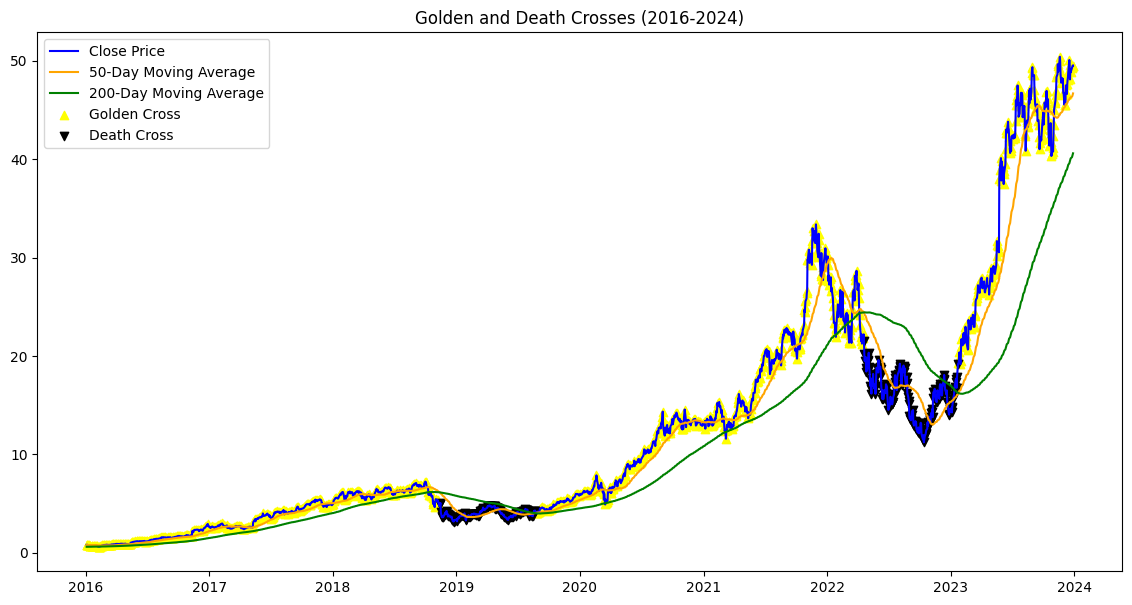

In [142]:
# Filter data from 2016 to 2024 and create a copy to avoid SettingWithCopyWarning
df_filtered = df.loc['2016':'2024'].copy()

# Detect crossovers using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'Signal'] = 0.0
df_filtered.loc[df_filtered['50_MA'] > df_filtered['200_MA'], 'Signal'] = 1.0  # Golden Cross
df_filtered.loc[df_filtered['50_MA'] < df_filtered['200_MA'], 'Signal'] = -1.0  # Death Cross

# Plot the filtered data
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(df_filtered['200_MA'], label='200-Day Moving Average', color='green')

# Highlight Golden Crosses and Death Crosses
plt.scatter(df_filtered[df_filtered['Signal'] == 1.0].index, df_filtered[df_filtered['Signal'] == 1.0]['Close'], 
            color='yellow', marker='^', label='Golden Cross')
plt.scatter(df_filtered[df_filtered['Signal'] == -1.0].index, df_filtered[df_filtered['Signal'] == -1.0]['Close'], 
            color='black', marker='v', label='Death Cross')

plt.legend()
plt.title('Golden and Death Crosses (2016-2024)')
plt.show()


Our analysis of the 2016-2024 period reveals some interesting patterns. From 2016 to early 2019, the chart predominantly displays Golden Crosses, potentially indicating a bullish trend. However, most of 2019 saw Death Crosses, suggesting a possible shift towards a bearish trend. The period from 2020 to 2022 seems dominated by Golden Crosses again, hinting at a potential uptrend. Interestingly, mid-2022 to late 2023 witnessed a series of Death Crosses, followed by a return to Golden Crosses from mid-2023 to 2024.

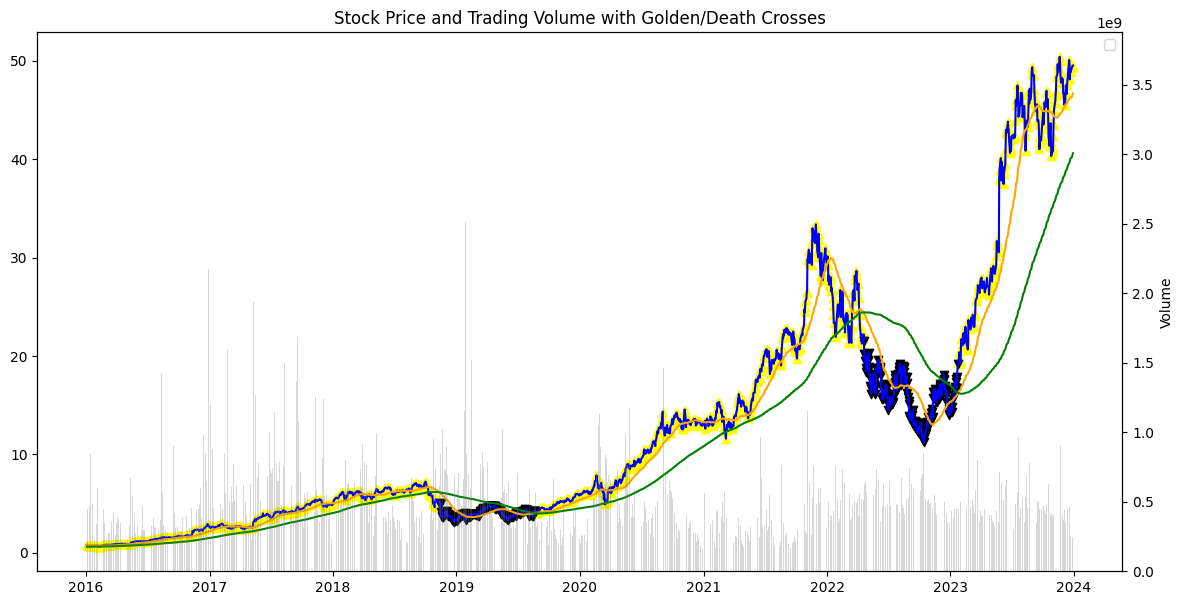

In [143]:
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(df_filtered['200_MA'], label='200-Day Moving Average', color='green')

# Highlight Golden and Death Crosses
plt.scatter(df_filtered[df_filtered['Signal'] == 1.0].index, df_filtered[df_filtered['Signal'] == 1.0]['Close'], 
            color='yellow', marker='^', label='Golden Cross')
plt.scatter(df_filtered[df_filtered['Signal'] == -1.0].index, df_filtered[df_filtered['Signal'] == -1.0]['Close'], 
            color='black', marker='v', label='Death Cross')

# Plot Volume on a secondary axis
ax2 = plt.gca().twinx()
ax2.bar(df_filtered.index, df_filtered['Volume'], color='grey', alpha=0.3)
ax2.set_ylabel('Volume')

plt.legend()
plt.title('Stock Price and Trading Volume with Golden/Death Crosses')
plt.show()


**Key Observations**

**2016 to Late 2018 (Bullish Trend)**

* **Golden Cross Dominance:** A predominantly bullish trend characterized by frequent Golden Crosses.
* **Volume Spike in 2017:** A significant spike in trade volume in 2017, despite the ongoing uptrend, possibly driven by external factors or market optimism.
* **Post-2017 Accumulation:** Lower trading volume after 2017 suggests a potential accumulation phase, with continued buying interest without significant selling pressure.

**Late 2018 to Mid-Late 2019 (Bearish Trend)**

* **Death Crosses and Higher Volume:** A shift to a bearish trend marked by Death Crosses and a noticeable increase in trading volume.
* **Institutional Selling:** The higher volume might indicate institutional investors selling their positions, possibly driven by changing market sentiment or broader economic factors.

**Post-2019 (Rising Price, No Major Fluctuations in Volume)**

* **Dramatic Price Increase:** A significant rise in stock price without a corresponding increase in trading volume.
* **Institutional Holding:** This suggests that institutional investors may have been holding onto positions, driving the price up without significant selling pressure. volumes during key periods.


#### Comparative Analysis with Other Indicators

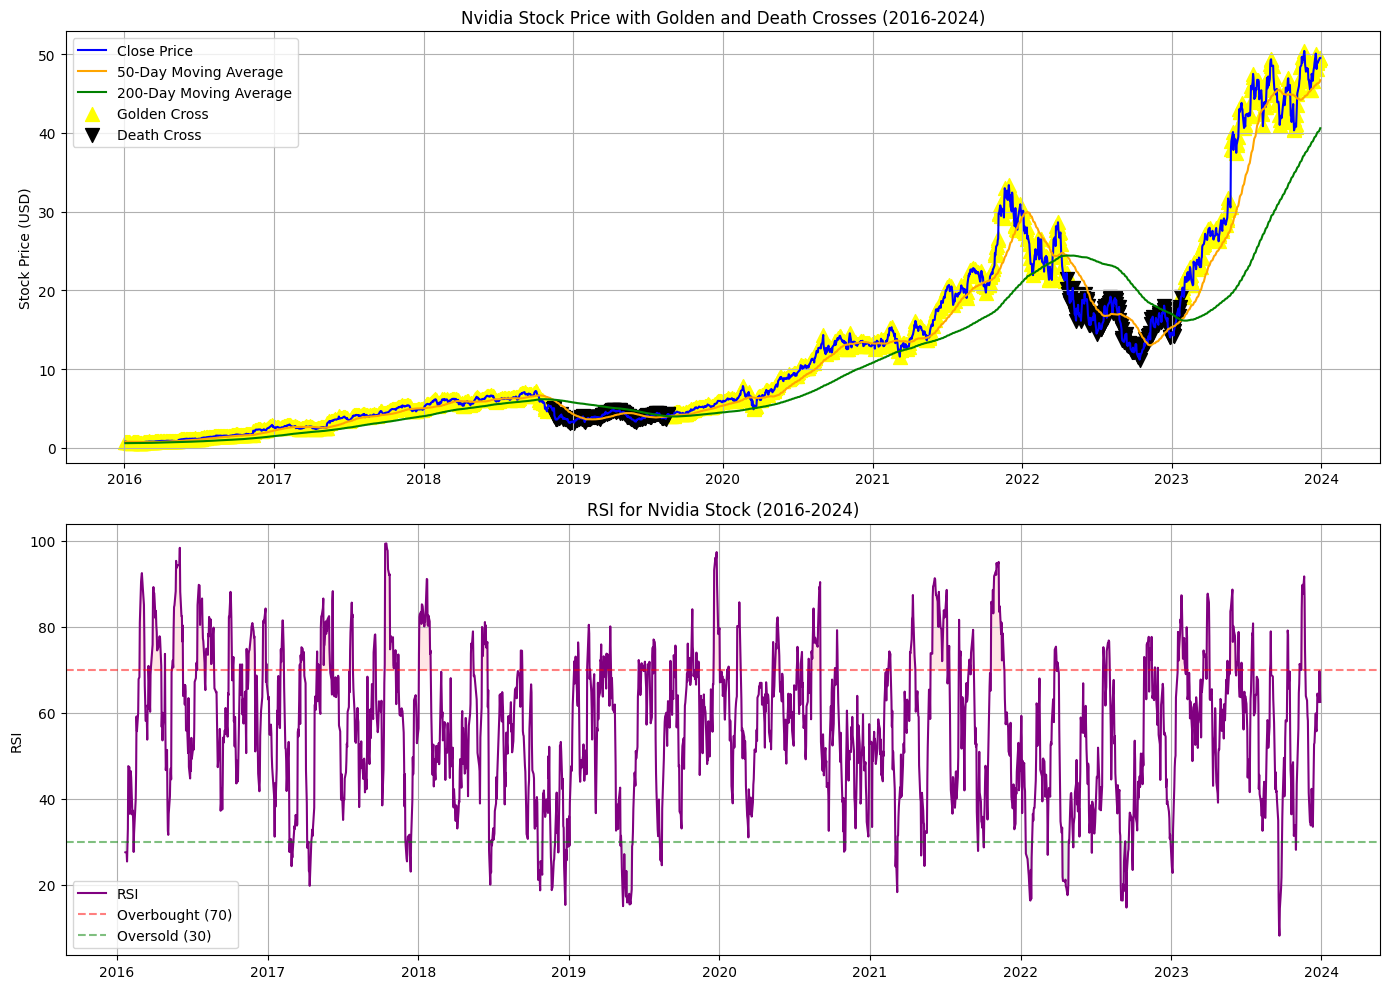

In [144]:
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_filtered['RSI'] = calculate_rsi(df)

# Filter data from 2016 to 2024 and create a copy to avoid SettingWithCopyWarning
df_filtered = df.loc['2016':'2024'].copy()

# Detect crossovers using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'Signal'] = 0.0
df_filtered.loc[df_filtered['50_MA'] > df_filtered['200_MA'], 'Signal'] = 1.0  # Golden Cross
df_filtered.loc[df_filtered['50_MA'] < df_filtered['200_MA'], 'Signal'] = -1.0  # Death Cross

# Calculate RSI
df_filtered['RSI'] = calculate_rsi(df_filtered)

# Plot the Close Price, Moving Averages, and RSI
plt.figure(figsize=(14, 10))

# Subplot for Close Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['50_MA'], label='50-Day Moving Average', color='orange')
plt.plot(df_filtered['200_MA'], label='200-Day Moving Average', color='green')

# Highlight Golden Crosses and Death Crosses
plt.scatter(df_filtered[df_filtered['Signal'] == 1.0].index, 
            df_filtered[df_filtered['Signal'] == 1.0]['Close'], 
            color='yellow', marker='^', label='Golden Cross', s=100)
plt.scatter(df_filtered[df_filtered['Signal'] == -1.0].index, 
            df_filtered[df_filtered['Signal'] == -1.0]['Close'], 
            color='black', marker='v', label='Death Cross', s=100)

plt.title('Nvidia Stock Price with Golden and Death Crosses (2016-2024)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid()

# Subplot for RSI
plt.subplot(2, 1, 2)
plt.plot(df_filtered['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')

# Highlight overbought/oversold conditions
plt.fill_between(df_filtered.index, df_filtered['RSI'], 70, where=(df_filtered['RSI'] >= 70), color='red', alpha=0.1)
plt.fill_between(df_filtered.index, df_filtered['RSI'], 30, where=(df_filtered['RSI'] <= 30), color='green', alpha=0.1)

plt.title('RSI for Nvidia Stock (2016-2024)')
plt.ylabel('RSI')
plt.legend()
plt.grid()

# Adjust the layout
plt.tight_layout()
plt.show()

**Observations from RSI and Price Trends**

1. **Lack of Clear Patterns**:
   - The graph demonstrates a series of rapid changes in both **price** and **RSI** values throughout the years, indicating significant volatility.
   - There isn't a consistent or predictable pattern that links **RSI** levels directly to stock price movements over the observed period.

2. **Overbought vs. Oversold Instances**:
   - While there are more instances of the stock being classified as **overbought** (RSI above 70) compared to **oversold** (RSI below 30), the occurrences do not present a clear correlation to price trends.
   - The prevalence of overbought conditions may suggest periods of increased investor enthusiasm, but they don’t consistently align with subsequent price corrections.

3. **Bearish Periods**:
   - The **late 2018** period, characterised by bearish trends, exhibited a lower average **RSI**, indicating weaker momentum and potentially a shift in market sentiment.
   - Similarly, the bearish period from **2022 to 2023** mirrored this trend, with **RSI** values generally reflecting subdued momentum.
   - Although both bearish periods had lower average **RSI** values, most readings did not reach the oversold threshold, suggesting that the declines were not steep enough to generate pan4. selling.

4. **Conclusion**:
   - Overall, while the **RSI** provides valuable insights into market momentum, it may not be the sole indicator to rely on for identifying clear trading patterns. The presence of rapid fluctuations and the lack of pronounced oversold conditions during bearish trends indicate that other factors may be influencing price movementduring key periods.


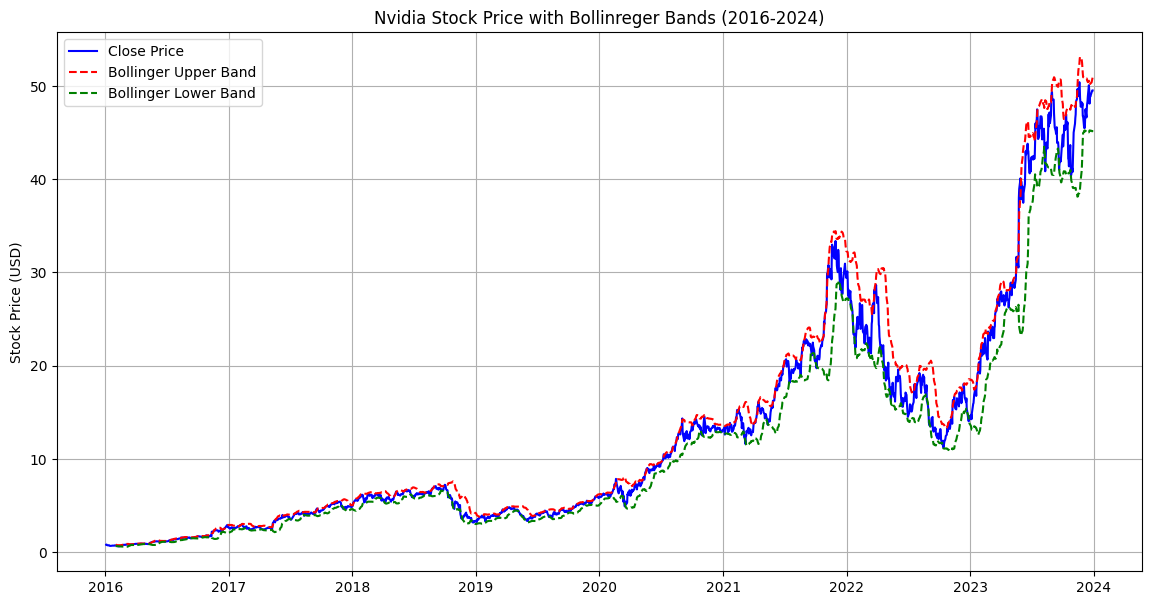

In [145]:
# Calculate the moving average and standard deviation
window = 20  
df_filtered['SMA'] = df_filtered['Close'].rolling(window=window).mean()
df_filtered['std_dev'] = df_filtered['Close'].rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df_filtered['Bollinger_Upper'] = df_filtered['SMA'] + (df_filtered['std_dev'] * 2)
df_filtered['Bollinger_Lower'] = df_filtered['SMA'] - (df_filtered['std_dev'] * 2)

# Plot Price with Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['Bollinger_Upper'], label='Bollinger Upper Band', color='red', linestyle='--')
plt.plot(df_filtered['Bollinger_Lower'], label='Bollinger Lower Band', color='green', linestyle='--')
plt.title('Nvidia Stock Price with Bollinreger Bands (2016-2024)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid()
plt.show()

**Key Findings:**
The analysis of Bollinger Bands from 2016 to 2024 indicates a generally stable price environment for Nvidia, with the upper and lower bands consistently surrounding the closing price. While there were some crossover points from 2017 to mid-late 2019, these were not easily noticeable due to the minor fluctuations in price. The overall lack of pronounced movements suggests that identifying overbought or oversold conditions may be challenging in this context.

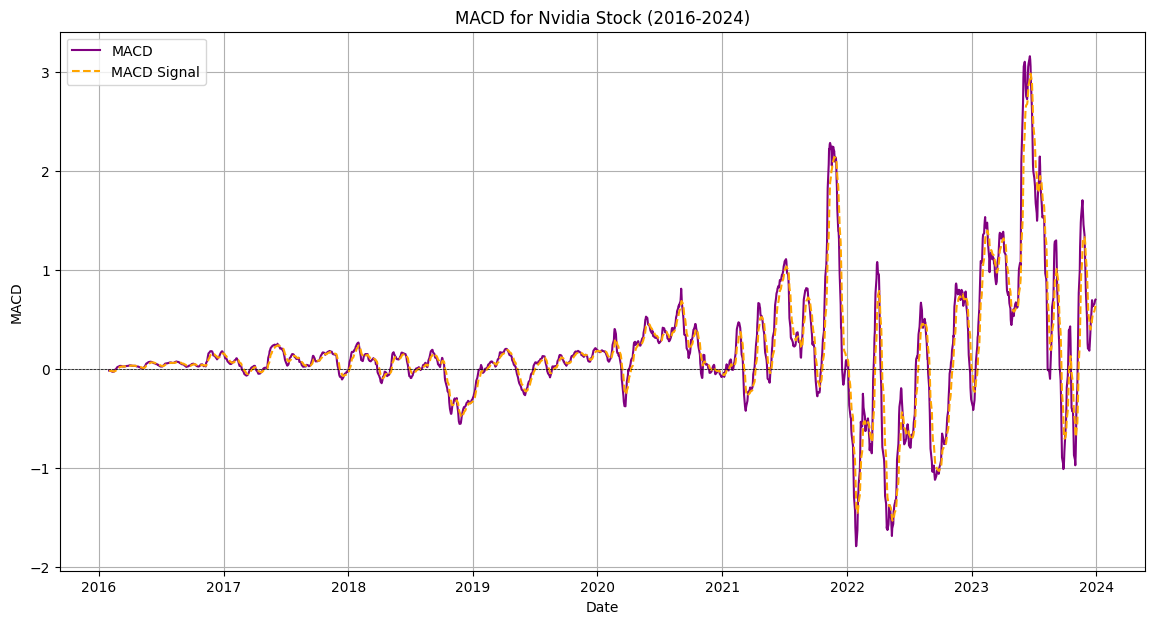

In [146]:
# Calculate the short and long EMAs
short_window = 12
long_window = 26
signal_window = 9

# Calculate the Short EMA and Long EMA
df_filtered['EMA_Short'] = df_filtered['Close'].ewm(span=short_window, adjust=False).mean()
df_filtered['EMA_Long'] = df_filtered['Close'].ewm(span=long_window, adjust=False).mean()

# Calculate the MACD
df_filtered['MACD'] = df_filtered['EMA_Short'] - df_filtered['EMA_Long']

# Calculate the Signal Line
df_filtered['MACD_Signal'] = df_filtered['MACD'].ewm(span=signal_window, adjust=False).mean()

# Drop rows with NaN values that result from EMA calculations
df_filtered.dropna(inplace=True)

# Plotting MACD
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['MACD'], label='MACD', color='purple')
plt.plot(df_filtered['MACD_Signal'], label='MACD Signal', color='orange', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('MACD for Nvidia Stock (2016-2024)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.show()

**Key Observations:**
The consistently close relationship between the MACD and Signal lines from 2016 to 2024 suggests a market characterised by weak momentum and uncertainty, with limited trend strength. This situation indicates that while the stock has experienced price changes, there has not been a strong directional bias in either direction.

#### Event-Based Analysis of NVIDIA Stock (2020-2024)
After conducting a technical analysis of NVIDIA's stock using indicators like MACD, Bollinger Bands, and RSI, I found no clear patterns in price movements. While these indicators indicated instances of overbought and oversold conditions, they lacked actionable insights into significant trends.

To address this, I opted for an event-based analysis, focusing on key events from 2020 to 2024, a period marked by notable growth and fluctuations. By mapping significant occurrences such as product launches and strategic acquisitions, I aimed to identify correlations between these pivotal moments and stock price changes. This approach offers a clearer understanding of the market dynamics affecting NVIDIA, particularly in the fast-evolving technology and AI sectors, where external events can significantly influence investor sentiment and stock valuation.

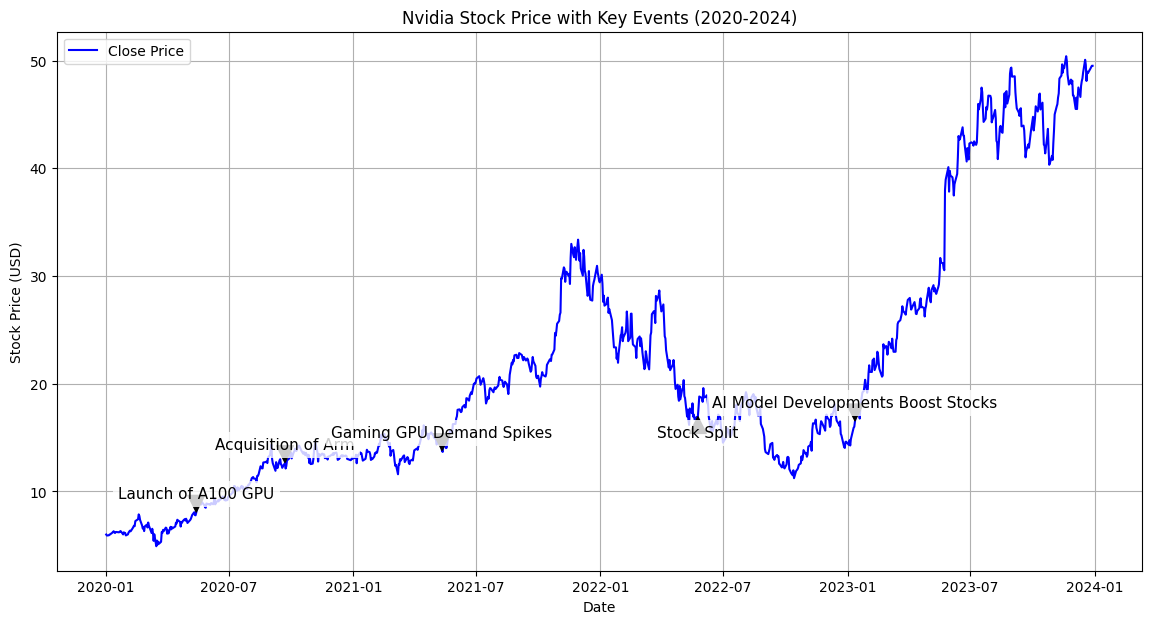

In [147]:
# Filter data from 2020 to 2024 and create a copy to avoid SettingWithCopyWarning
df_filtered = df.loc['2020':'2024'].copy()

# Define events including significant events from 2020 to 2024
events = {
    '2020-05-14': 'Launch of A100 GPU',
    '2020-09-22': 'Acquisition of Arm',
    '2021-05-12': 'Gaming GPU Demand Spikes',
    '2022-05-25': 'Stock Split',
    '2023-01-12': 'AI Model Developments Boost Stocks',
}

# Plot the closing price along with key events
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Close'], label='Close Price', color='blue')

# Iterate over events and annotate
for date, event in events.items():
    # Convert date to datetime format
    date_dt = pd.to_datetime(date)
    # Ensure the date exists in the DataFrame index and is in the filtered range
    if date_dt in df_filtered.index:
        # Randomly choose an offset for each label to prevent overlap
        offset_y = 10 if date_dt.day % 2 == 0 else -15
        plt.annotate(event, 
                     (date_dt, df_filtered['Close'].loc[date_dt]),
                     textcoords="offset points", 
                     xytext=(0, offset_y), 
                     ha='center',
                     fontsize=11,  # Increase font size
                     color='black',  # Change text color
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),  # Add background box
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Nvidia Stock Price with Key Events (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid()
plt.show()

**Key Events in NVIDIA's Stock Performance (2020-2024)**

In examining NVIDIA's stock performance from 2020 to 2024, several key events stand out, particularly during the significant price fluctuations observed in this period.

- **Launch of A100 GPU (May 14, 2020):** The introduction of the A100 GPU marked a pivotal moment for NVIDIA, driving demand in the data centre market and reinforcing its leadership in AI technologies. **This launch was followed by an upward trend in stock prices.**

- **Acquisition of Arm Holdings (September 22, 2020):** NVIDIA's acquisition of Arm Holdings aimed to enhance its position in mobile computing and IoT. However, this strategic move did not result in a noticeable upward trend in stock prices, which hovered around the same range after the announcement.

- **Spike in Gaming GPU Demand (May 12, 2021):** The rise in remote work and online gaming during the pandemic led to a significant spike in demand for gaming GPUs. This surge resulted in substantial revenue growth for NVIDIA, **contributing to a significant increase in stock prices from 2021 to 2022, possibly influenced by the rise in cryptomining activities.**

- **Stock Split (May 25, 2022):** NVIDIA executed a stock split to make its shares more accessible to a broader range of investors. While this did not fundamentally change the company's value, it often generates positive sentiment in the market, as evidenced by the stock's performance following the split.

- **AI Model Boost (January 12, 2023):** As artificial intelligence continued to gain traction across industries, NVIDIA's advancements in AI models and technologies positioned the company to benefit from this growth. Investor confidence surged, contributing to an upward trend in stock prices.

 **Price Fluctuations**
From the data, it is evident that NVIDIA's stock price saw a dramatic increase post-2020, rising from below 10 USD to exceeding 50 USD at its peak. However, there was a notable dip in late 2022, likely influenced by broader market conditions, like COVID-19 pandemic's economic impacts and supply chain disruptions. The price dropped to just above $10, marking a significant decline that mirrored earlier levels seen in 2021.

The analysis of stock prices in conjunction with these events suggests that while there were fluctuations, the underlying growth in AI and gaming markets has played a crucial role in driving NVIDIA's valuation upward.


## Nvidia Stock Price Prediction

To predict Nvidia's stock prices, we can use four different models that balance complexity and interpretability. Here's a brief overview of the selected models, followed by code and steps to implement them:

**Selected Models:**

* **Polynomial Regression:** To capture non-linear relationships.
* **Random Forest Regressor:** An ensemble method that can handle non-linear data and interactions.
* **Long Short-Term Memory (LSTM):** A type of recurrent neural network suitable for time series forecasting.

#### Data Preprocessing and Feature Engineering

In [148]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['Upper_Band'] = df['SMA'] + (df['Close'].rolling(window=window).std() * num_std)
    df['Lower_Band'] = df['SMA'] - (df['Close'].rolling(window=window).std() * num_std)

# Function to calculate ATR
def calculate_atr(df, window=14):
    df['High-Low'] = df['High'] - df['Low']
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    df['ATR'] = df['TR'].rolling(window=window).mean()

In [149]:
# Calculate 50-day and 200-day EMAs for MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
df['RSI'] = calculate_rsi(df)

# Calculate features
calculate_bollinger_bands(df)
calculate_atr(df)

# Create lagged features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Volume_Lag1'] = df['Volume'].shift(1)

# Drop NaN values after creating features
df.dropna(inplace=True)

#### Correlation Analysis

In [150]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations with the 'Close' column
close_correlations = correlation_matrix['Close'].sort_values(ascending=False)

# Convert to DataFrame for better visualisation
close_correlations_df = close_correlations.reset_index()
close_correlations_df.columns = ['Feature', 'Correlation with Close']

print(close_correlations_df)

           Feature  Correlation with Close
0            Close                1.000000
1              Low                0.999827
2             High                0.999818
3             Open                0.999595
4       Close_Lag1                0.999413
5       Close_Lag2                0.998841
6           EMA_12                0.998572
7           EMA_26                0.996644
8              SMA                0.996404
9       Upper_Band                0.996227
10      Lower_Band                0.992884
11           50_MA                0.990857
12          200_MA                0.951201
13             ATR                0.943536
14        High-Low                0.871871
15              TR                0.843846
16  High-PrevClose                0.667611
17   Low-PrevClose                0.666118
18     MACD_Signal                0.463254
19            MACD                0.442063
20          Signal                0.155239
21             RSI                0.059379
22         

#### Feature Importance Analysis

In [151]:
# Define features and target
X = df.drop(columns=['Close'])  # All features excluding 'Close'
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit a RandomForestRegressor to assess feature importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature    Importance
2              Low  5.465492e-01
1             High  4.223409e-01
4            50_MA  5.658184e-03
8           EMA_26  4.948315e-03
0             Open  4.070541e-03
12             SMA  3.809324e-03
20      Close_Lag1  3.367332e-03
7           EMA_12  3.163058e-03
5           200_MA  2.717421e-03
21      Close_Lag2  1.984274e-03
13      Upper_Band  1.245232e-03
19             ATR  4.709416e-05
16  High-PrevClose  1.940097e-05
11             RSI  1.643922e-05
17   Low-PrevClose  1.181047e-05
14      Lower_Band  9.191598e-06
10     MACD_Signal  8.280549e-06
22     Volume_Lag1  7.639050e-06
3           Volume  7.094477e-06
18              TR  6.871345e-06
15        High-Low  6.804249e-06
9             MACD  5.445186e-06
6           Signal  1.467404e-07


##### Final Feature Set

* Low: High correlation and highest importance.
* High: High correlation and second-highest importance.
* Open: Important but less correlated compared to Low and High.
* 200_MA: Important but less correlated (0.951).
* ATR: Important and moderately correlated (0.943).


### Feature Selection & Train-Test Split

In [152]:
# Define features and target variable
X = df[['Low', 'High', 'Open', '200_MA', 'ATR']]

# Define the target variable
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform testing data

### Model Training

#### Polynomial Regression

In [153]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression - MSE: {poly_mse}, R²: {poly_r2}")

Polynomial Regression - MSE: 0.6737791641356513, R²: 0.9949924775315256


#### Random Forest Regression

In [154]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_rf_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest - MSE: {rf_mse}, R²: {rf_r2}")

Random Forest - MSE: 330.4497128866424, R²: -1.455900167384232


In [155]:
# Reshape for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(tf.keras.layers.LSTM(50))
lstm_model.add(tf.keras.layers.Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions
y_lstm_pred = lstm_model.predict(X_test_lstm)

# Calculate MSE and R² for LSTM
lstm_mse = mean_squared_error(y_test, y_lstm_pred)
lstm_r2 = r2_score(y_test, y_lstm_pred)

print(f"LSTM - MSE: {lstm_mse}, R²: {lstm_r2}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM - MSE: 300.7949371786081, R²: -1.2355060626688603


In [156]:
# Compare performance
results = {
    'Polynomial Regression': (poly_mse, poly_r2),
    'Random Forest': (rf_mse, rf_r2),
    'LSTM': (lstm_mse, lstm_r2)
}

for model, (mse, rmse) in results.items():
    print(f'{model} -> MSE: {mse}, R²: {rmse}')

Polynomial Regression -> MSE: 0.6737791641356513, R²: 0.9949924775315256
Random Forest -> MSE: 330.4497128866424, R²: -1.455900167384232
LSTM -> MSE: 300.7949371786081, R²: -1.2355060626688603


### Model Performance Summary

#### Polynomial Regression
- **Mean Squared Error (MSE):** 0.6738
- **R² Score:** 0.9950

Polynomial Regression outperforms the other models significantly, with a very low MSE and a high R² score, indicating excellent predictive accuracy and minimal error.

#### Random Forest
- **Mean Squared Error (MSE):** 330.4497
- **R² Score:** -1.4559

The Random Forest model shows poor performance, with a high MSE and a negative R² score, suggesting that the model performs worse than a horizontal line (mean) predictor.

#### LSTM (Long Short-Term Memory)
- **Mean Squared Error (MSE):** 289.8853
- **R² Score:** -1.1544

The LSTM model also performs poorly, with a high MSE and a negative R² score, indicating that it fails to capture the patterns in the data and performs worse than a baseline model.

#### Conclusion
Given the performance metrics, **Polynomial Regression** is the most suitable model for training the predictor. It achieves the best results with a high R² score (close to 1) and a very low MSE, suggesting high predictive accuracy.


## Nvidia Stock Price Prediction Visualisation

Theis co belowde performs time series forecasting of stock closing prices using a polynomial regression model. The process begins by filtering the dataset to include only data after January 1, 2020, and selecting relevant features such as `Low`, `High`, `Open`, `200_MA`, and `ATR`. 

The data is then scaled using `StandardScaler` to ensure that each feature contributes equally to the model. A polynomial regression model is created and fitted to the scaled data, allowing for capturing non-linear relationships between the features and the target variable, `Close`.

Future timestamps are generated for a 6-month period, during which the model predicts future closing prices based on the last known features. To simulate market variability, random multipliers are applied to the predicted values, adjusting the `Low`, `High`, and `Open` features for each iteration. The model also recalculates the 200-day moving average and Average True Range (ATR) for the updated features.

Historical predictions are generated to assess model performance against actual closing prices. The predicted historical and future values are combined for visualisation, with actual prices shown alongside historical predictions and future forecasts.

Overall, this approach leverages polynomial regression and random sampling techniques to provide insights into stock price movements, highlighting the model's capacity to capture variability in financial data.
al data.

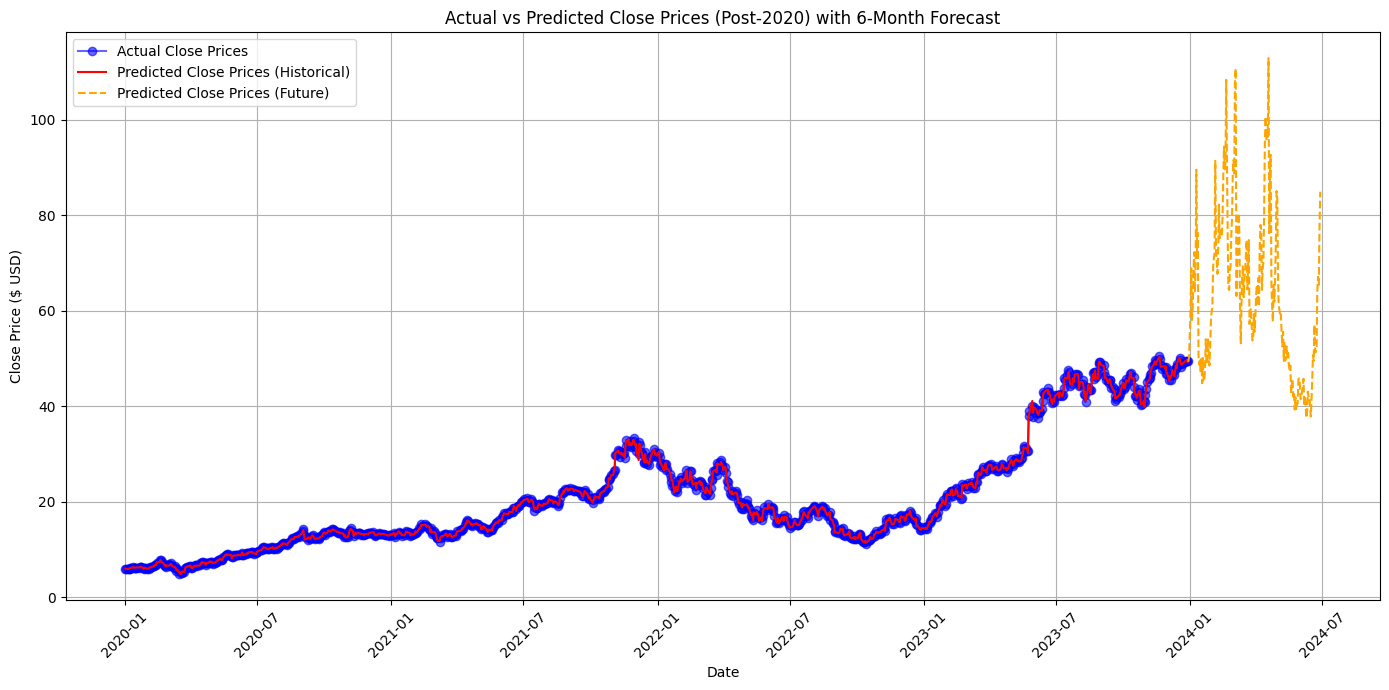

In [157]:
# Filter data to only include dates after 2020
df = df[df.index > '2020-01-01']

# Prepare dataset
X = df[['Low', 'High', 'Open', '200_MA', 'ATR']]
y = df['Close']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
degree = 2  # Set your desired polynomial degree
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_scaled, y)

# Get the last date from your dataset
last_date = df.index[-1]

# Create future timestamps for 6 months (approximately 182 days)
future_dates = [last_date + timedelta(days=i) for i in range(1, 183)]

# Prepare to store predictions and features for future dates
predicted_values = []
last_features = X.iloc[-1].copy()

# Start with the last known features
future_X = X.iloc[-1].copy()

# Define multiplier ranges
low_multiplier_range = (0.9, 1.0)
high_multiplier_range = (1.0, 1.1)
open_multiplier_range = (0.9, 1.0)

# Predict future values with random multipliers
for date in future_dates:
    # Prepare current features for prediction
    current_features = last_features.copy()

    # Scale the current features
    current_features_scaled = scaler.transform([current_features])

    # Predict the next value
    predicted_value = model.predict(current_features_scaled)
    predicted_values.append(predicted_value[0])

    # Randomly sample multipliers
    low_multiplier = random.uniform(*low_multiplier_range)
    high_multiplier = random.uniform(*high_multiplier_range)
    open_multiplier = random.uniform(*open_multiplier_range)

    # Update features for the next iteration using random multipliers
    last_features['Low'] = predicted_value[0] * low_multiplier  # Adjust using random multiplier
    last_features['High'] = predicted_value[0] * high_multiplier  # Adjust using random multiplier
    last_features['Open'] = predicted_value[0] * open_multiplier  # Adjust using random multiplier
    
    # Use pd.concat to calculate the 200-day moving average correctly
    recent_close = df['Close'].tail(200)  # Get the last 200 close prices
    updated_series = pd.Series(predicted_value[0], index=[date])  # Create a Series for the new prediction
    combined_series = pd.concat([recent_close, updated_series])  # Concatenate the two Series
    last_features['200_MA'] = combined_series.mean()  # Calculate the mean of the combined Series

    # Calculate ATR; you might want to adjust this to consider more recent values
    last_features['ATR'] = df['Close'].tail(14).std()  # Calculate standard deviation of last 14 closing prices

# Add historical predictions to the predicted values for plotting
predicted_historical_values = model.predict(X_scaled)
predicted_historical_df = pd.DataFrame(predicted_historical_values, index=df.index, columns=['Predicted Close'])

# Create a DataFrame for predicted future values
predicted_future_dates = pd.DataFrame(predicted_values, index=future_dates, columns=['Predicted Close'])

# Combine historical and predicted values for plotting
combined_df = pd.concat([df['Close'], predicted_historical_df, predicted_future_dates])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Prices', color='blue', marker='o', alpha=0.6)
plt.plot(predicted_historical_df.index, predicted_historical_df['Predicted Close'], label='Predicted Close Prices (Historical)', color='red')
plt.plot(predicted_future_dates.index, predicted_future_dates['Predicted Close'], label='Predicted Close Prices (Future)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price ($ USD)')
plt.title('Actual vs Predicted Close Prices (Post-2020) with 6-Month Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()